In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy import integrate
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm 
import sympy as sm

R0 = 3.085271317829457


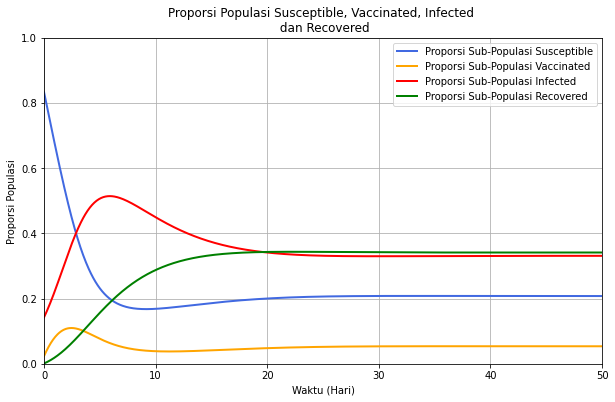

In [2]:
# nilai parameter R0 > 1 
mu = 0.1
beta1 = 0.85
beta2 = 0.7150
alpha =  0.1
gamma1 = 0.095
gamma2 = 0.05
omega = 0.02

# asumsi nilai awal 
S = 7000
I = 1200
V = 200
R = 10
N = S + V + I +R

s_awal = S/N
v_awal = V/N
i_awal = I/N
r_awal = R/N

# nilai R0
a = beta1*mu
b = (alpha+mu)*(mu+omega+gamma1)
c = alpha*beta2*mu
d = (alpha+mu)*(mu+gamma2)*(mu+gamma1+omega)
R0 = a/b + c/d
print("R0 =", R0)

# Model SVIR 
def deriv(x, t, mu, beta1, beta2, alpha, omega, gamma1, gamma2):
    s, v, i, r = x
    dsdt = mu - mu * s - beta1 * s * i - alpha * s
    dvdt = alpha * s - beta2 * v * i - gamma2 * v - mu * v
    didt = beta1 * s * i + beta2 * v * i - gamma1 * i - omega * i - mu * i
    drdt = gamma2 * v + gamma1 * i - mu * r
    return [dsdt, dvdt, didt, drdt]

# Membuat array waktu dan menjalankan integrasi persamaan SVIR menggunakan odeint dari Scipy
t = np.linspace(0,50,1000)
x_awal = s_awal, v_awal, i_awal, r_awal
soln = odeint(deriv, x_awal, t, args=(mu,beta1, beta2, alpha, omega, gamma1,gamma2))
s, v, i, r = soln.T

# Plot hasil integrasi persamaan SVIR menggunakan library Matplotlib
fig = plt.rcParams.update({'font.size':16})
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(t, s, lw=2, label='Proporsi Sub-Populasi Susceptible', color='royalblue')
ax.plot(t, v, lw=2, label='Proporsi Sub-Populasi Vaccinated', color='orange')
ax.plot(t, i, lw=2, label='Proporsi Sub-Populasi Infected', color='red')
ax.plot(t, r, lw=2, label='Proporsi Sub-Populasi Recovered',color='green')
ax.set_title('Proporsi Populasi Susceptible, Vaccinated, Infected \n dan Recovered')
ax.set_xlim(0,50)
ax.set_ylim(0,1)
ax.set_xlabel('Waktu (Hari)')
ax.set_ylabel('Proporsi Populasi')
ax.grid(True)
ax.legend()

In [3]:
# Menentukan Titik Equilibrium
# Definisikan S dan I, asumsikan tidak ada nilai negatif
s, v, i, r = sm.symbols('s, v, i, r', negative=False)
S = mu - mu * s - beta1 * s * i - alpha * s
V = alpha * s - beta2 * v * i - gamma2 * v - mu * v
I = beta1 * s * i + beta2 * v * i - gamma1 * i - omega * i - mu * i
R = gamma2 * v + gamma1 * i - mu * r

# sympy untuk mengatur persamaan menjadi nol
SEqual = sm.Eq(S, 0)
VEqual = sm.Eq(V, 0)
IEqual = sm.Eq(I, 0)
REqual = sm.Eq(R, 0)
 
# menghitung titik ekuilibrium
equilibria = sm.solve( (SEqual, VEqual, IEqual, REqual), s, v, i, r)
print("Diperoleh titik ekuilibrium = ", equilibria)

Diperoleh titik ekuilibrium =  [(0.207746994700741, 0.0537273489571608, 0.331005572959776, 0.341318968790367), (0.500000000000000, 0.333333333333333, 0.0, 0.166666666666667)]


In [4]:
# mengubah titik ekuilibrium ke dalam array dengan library numpy 
eq = np.array(equilibria)
eq0 = np.take(eq,[0]) # se
eq1 = np.take(eq,[1]) # ve
eq2 = np.take(eq,[2]) # ie
eq3 = np.take(eq,[3]) # re
eq4 = np.take(eq,[4]) # sb
eq5 = np.take(eq,[5]) # vb
eq6 = np.take(eq,[6]) # ib
eq7 = np.take(eq,[7]) # rb

# titik equilibrium s,i
titik_si = np.array([(eq0,eq4),(eq2,eq6)])

# titik equilibrium s,v
titik_sv = np.array([(eq0,eq4),(eq1,eq5)])

# titik equilibrium v,i
titik_vi = np.array([(eq1,eq5),(eq2,eq6)])

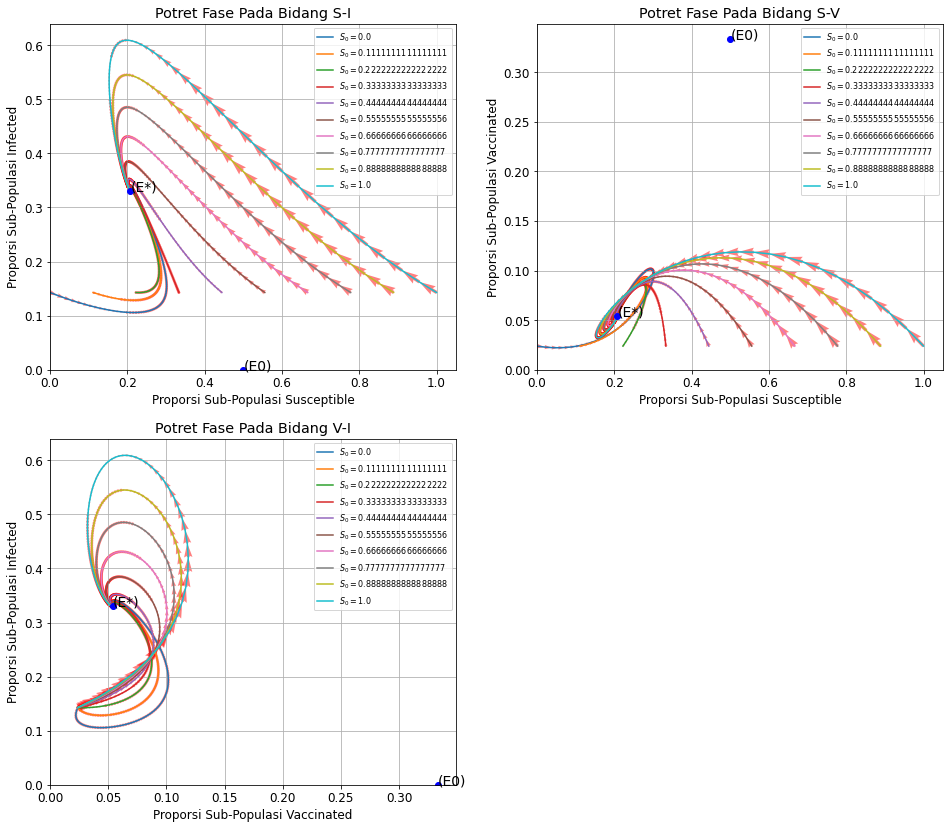

In [5]:
# menggambarkan potret fase menggunakan odeint dari scipy
fig = plt.rcParams.update({'font.size':12})
fig = plt.figure(figsize=(16,14))
ax = [fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223)]

# solusi model dengan odeint
IC = np.linspace(0, 1, 10)
for s0 in IC:
    X0 = [s0,v_awal,i_awal,r_awal]
    Xs = odeint(deriv, X0, t, args=(mu, beta1, beta2, alpha, omega, gamma1, gamma2))
    n = 4
    Xs = Xs[::n, :]
    ax[0].plot(Xs[:,0], Xs[:,2], "-", label = "$S_0 =$"+str(X0[0]))
    ax[0].quiver(Xs[:-1, 0], Xs[:-1, 2], Xs[1:, 0] - Xs[:-1, 0], Xs[1:, 2] - Xs[:-1, 2], 
                 scale_units='xy', angles='xy', width=0.008, scale=1, color='r', alpha=0.5)
    ax[1].plot(Xs[:,0], Xs[:,1], "-", label = "$S_0 =$"+str(X0[0]))
    ax[1].quiver(Xs[:-1, 0], Xs[:-1, 1], Xs[1:, 0] - Xs[:-1, 0], Xs[1:, 1] - Xs[:-1, 1], 
                 scale_units='xy', angles='xy', width=0.008, scale=1, color='r', alpha=0.5)
    ax[2].plot(Xs[:,1], Xs[:,2], "-", label = "$S_0 =$"+str(X0[0]))
    ax[2].quiver(Xs[:-1, 1], Xs[:-1, 2], Xs[1:, 1] - Xs[:-1, 1], Xs[1:, 2] - Xs[:-1, 2], 
                 scale_units='xy', angles='xy', width=0.008, scale=1, color='r', alpha=0.5)

# plot titik ekuilibrium        
#bidang s-i
ax[0].plot(titik_si[0], titik_si[1], 'bo')
ax[0].text(eq0, eq2,'(E*)',fontsize=14, fontweight='medium')
ax[0].text(eq4, eq6,'(E0)',fontsize=14, fontweight='medium')

#bidang s-v
ax[1].plot(titik_sv[0], titik_sv[1], 'bo')
ax[1].text(eq0, eq1,'(E*)',fontsize=14, fontweight='medium')
ax[1].text(eq4, eq5,'(E0)',fontsize=14, fontweight='medium')

#bidang v-i
ax[2].plot(titik_vi[0], titik_vi[1], 'bo')
ax[2].text(eq1, eq2,'(E*)',fontsize=14, fontweight='medium')
ax[2].text(eq5, eq6,'(E0)',fontsize=14, fontweight='medium')

# plot label
ax[0].set_title('Potret Fase Pada Bidang S-I')
ax[0].set_ylabel('Proporsi Sub-Populasi Infected')
ax[0].set_xlabel('Proporsi Sub-Populasi Susceptible')

ax[1].set_title('Potret Fase Pada Bidang S-V')
ax[1].set_ylabel('Proporsi Sub-Populasi Vaccinated')
ax[1].set_xlabel('Proporsi Sub-Populasi Susceptible')

ax[2].set_title('Potret Fase Pada Bidang V-I')
ax[2].set_ylabel('Proporsi Sub-Populasi Infected')
ax[2].set_xlabel('Proporsi Sub-Populasi Vaccinated')

# grid
for a in ax: 
    a.grid(True)
    a.set_xlim(0,)
    a.set_ylim(0,)
    a.legend(fontsize=8)

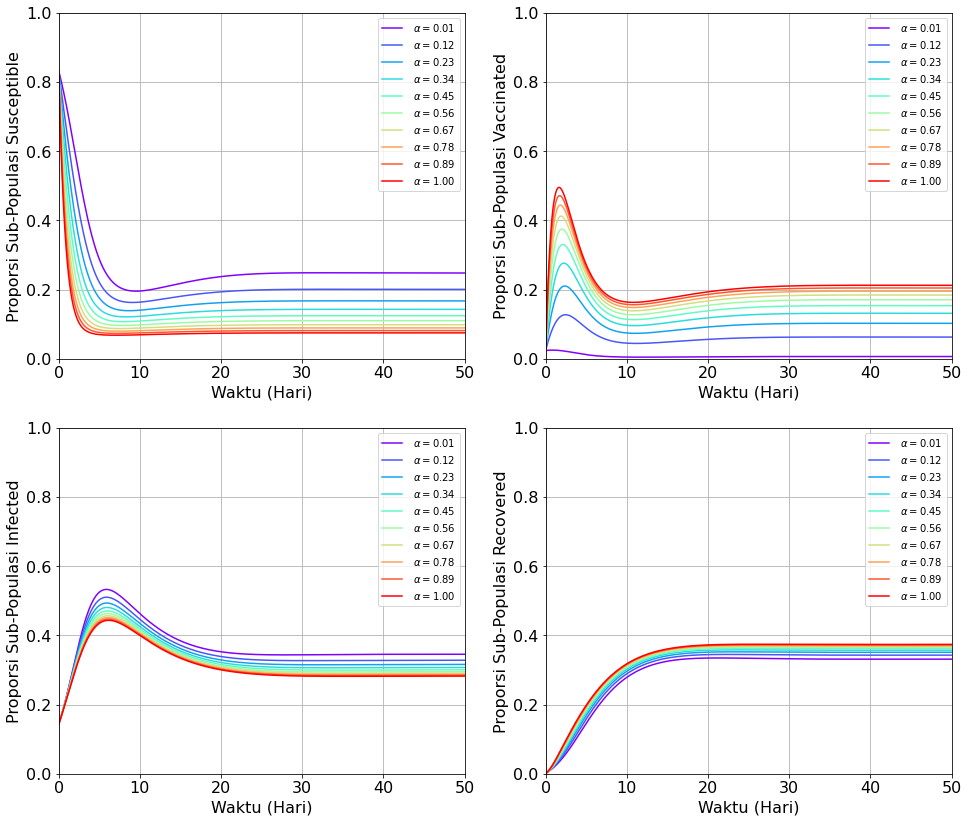

In [6]:
alpha = np.linspace(0.01, 1, 10)

nums=np.random.random((10,len(alpha)))
colors = cm.rainbow(np.linspace(0, 1, nums.shape[0]))  # generate the colors for each data set

fig = plt.rcParams.update({'font.size':16})
fig = plt.figure(figsize=(16,14))
ax = [fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)]

for alpha, i in zip(alpha, range(len(alpha))):
    res = odeint(deriv, x_awal, t, args=(mu, beta1, beta2, alpha, omega, gamma1, gamma2))
    ax[0].plot(t, res[:,0], color = colors[i], linestyle = '-', label = r" $\alpha = $" + "{0:.2f}".format(alpha))
    ax[1].plot(t, res[:,1], color = colors[i], linestyle = '-', label = r" $\alpha = $" + "{0:.2f}".format(alpha))
    ax[2].plot(t, res[:,2], color = colors[i], linestyle = '-', label = r" $\alpha = $" + "{0:.2f}".format(alpha))
    ax[3].plot(t, res[:,3], color = colors[i], linestyle = '-', label = r" $\alpha = $" + "{0:.2f}".format(alpha))

# plot label
ax[0].set_ylabel('Proporsi Sub-Populasi Susceptible')    
ax[1].set_ylabel('Proporsi Sub-Populasi Vaccinated')
ax[2].set_ylabel('Proporsi Sub-Populasi Infected')    
ax[3].set_ylabel('Proporsi Sub-Populasi Recovered')

for a in ax: 
    a.grid(True)
    a.set_xlabel('Waktu (Hari)')
    a.set_xlim(0,50)
    a.set_ylim(0,1)
    a.legend(fontsize=10)

plt.savefig('C:/Users/FT/Desktop/sembuh.png', format='png', bbox_inches='tight')